Ce script contient l'analyse par méthode supervisée des amplicons, afin de faire la prédiction 2 classes, créant la variable "OPT_percent"

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot
import scipy as sp
import sklearn.cluster
import tqdm
from scipy.stats import zscore, kstest, kruskal

In [2]:
path = r"C:\Users\ahmed\MFE project"    
df_train = pd.read_csv(os.path.join(path, [i for i in os.listdir(path) if i.find("addfeat_Train_Amplicon")>-1][0]))
df_test = pd.read_csv(os.path.join(path, [i for i in os.listdir(path) if i.find("addfeat_Test_Amplicon")>-1][0]))

In [3]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [4]:
train_2class = df_train[(df_train["classe"]=="OPT")|(df_train["classe"]=="NC")]
test_2class = df_test[(df_test["classe"]=="OPT")|(df_test["classe"]=="NC")]

In [5]:
New_var1 = ['gc_percent', 'cov500_percent', 'fwd_e2e_percent', 'rev_e2e_percent']


In [6]:
from sklearn.tree import DecisionTreeClassifier
from joblib import load
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# clf =DecisionTreeClassifier(min_samples_leaf=17, max_depth= 10, min_samples_split= 9)
# clf.fit(train_2class[New_var1], train_2class["classe"])

clf = load("DT_model_train_saved2.joblib")

pred_train = clf.predict(df_train[New_var1])

pred_test = clf.predict(df_test[New_var1])


In [7]:
CM_train = confusion_matrix(df_train["classe"], pred_train, normalize="true", labels=["OPT", "NC", "SOPT", "NVA"])

CM_test = confusion_matrix(df_test["classe"], pred_test, normalize="true", labels=["OPT", "NC", "SOPT", "NVA"])


In [14]:
CM_train

array([[0.98379853, 0.01620147, 0.        , 0.        ],
       [0.11101442, 0.88898558, 0.        , 0.        ],
       [0.66990527, 0.33009473, 0.        , 0.        ],
       [0.92777596, 0.07222404, 0.        , 0.        ]])

In [8]:
confusion_matrix(df_test["classe"], pred_test, normalize=None, labels=["OPT", "NC", "SOPT", "NVA"])

array([[9394,  223,    0,    0],
       [ 325, 2542,    0,    0],
       [4110, 1888,    0,    0],
       [3298,  335,    0,    0]], dtype=int64)

In [13]:
CM_test

array([[0.9768119 , 0.0231881 , 0.        , 0.        ],
       [0.11335891, 0.88664109, 0.        , 0.        ],
       [0.68522841, 0.31477159, 0.        , 0.        ],
       [0.90778971, 0.09221029, 0.        , 0.        ]])

In [11]:
df_test.loc[:,"pred"] = pred_test
res_test = get_optpercent(df_test)

In [52]:
df_train.loc[:,"pred"] = pred_train
res_train = get_optpercent(df_train)

In [33]:
rescla_test = get_optperclass(df_test)

In [35]:
df_test

,Unnamed: 0,Unnamed: 0.1,contig_id,contig_srt,contig_end,region_id,attributes,gc_count,overlaps,fwd_e2e,...,ordre,longueur,contig_length,gc_percent,cov20_percent,cov100_percent,cov500_percent,fwd_e2e_percent,rev_e2e_percent,pred
0,0,33669,chr9,21970941,21971066,CHP2_CDKN2A_2,GENE_ID=CDKN2A,97,317,176,...,288,207,126,0.769841,1.0,1.0,0.0,0.941176,0.976923,OPT
1,1,33670,chr17,7577016,7577151,CHP2_TP53_7,GENE_ID=TP53,80,578,284,...,288,207,136,0.588235,1.0,1.0,1.0,0.972603,0.958042,OPT
2,2,33671,chr4,55946089,55946208,CHP2_KDR_9,GENE_ID=KDR,62,654,299,...,288,207,120,0.516667,1.0,1.0,1.0,0.980328,0.974212,OPT
3,3,33672,chr7,55248966,55249090,CHP2_EGFR_6,GENE_ID=EGFR,83,818,374,...,288,207,125,0.664000,1.0,1.0,1.0,0.984211,0.965753,OPT
4,4,33673,chr19,1220311,1220450,CHP2_STK11_2,GENE_ID=STK11,90,875,487,...,288,207,140,0.642857,1.0,1.0,1.0,0.993878,0.953247,OPT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22110,22110,30101,chr7,116423408,116423492,CHP2_MET_6,GENE_ID=MET;Pool=1,34,4545,3056,...,261,118,85,0.400000,1.0,1.0,1.0,0.961309,0.986091,OPT
22111,22111,30102,chr7,55241636,55241729,CHP2_EGFR_4,GENE_ID=EGFR;Pool=1,48,4617,2237,...,261,118,94,0.510638,1.0,1.0,1.0,0.946678,0.970719,OPT
22112,22112,30103,chr4,153245411,153245492,CHP2_FBXW7_5,GENE_ID=FBXW7;Pool=1,36,7005,4154,...,261,118,82,0.439024,1.0,1.0,1.0,0.978102,0.983321,OPT
22113,22113,30104,chr10,89720696,89720747,CHP2_PTEN_7,GENE_ID=PTEN;Pool=1,19,7249,3833,...,261,118,52,0.365385,1.0,1.0,1.0,0.990183,0.987574,OPT


<AxesSubplot:xlabel='classe', ylabel='OPT_percent'>

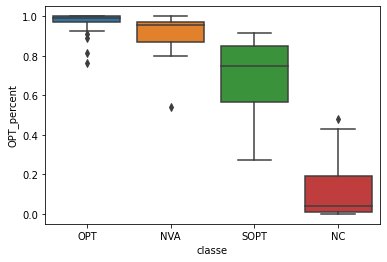

In [12]:
sns.boxplot(data=res_test, y="OPT_percent", x="classe")

<AxesSubplot:xlabel='classe', ylabel='OPT_percent'>

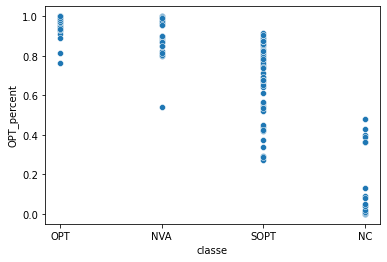

In [13]:
sns.scatterplot(data=res_test, y="OPT_percent", x="classe")

In [17]:
res_test[(res_test["classe"]=="NC") & (res_test["OPT_percent"]>=0)]["OPT_percent"].median()

0.04081632653061224

In [83]:
res_train[res_train["ordre"]==599]["OPT_percent"]

0    0.0
Name: OPT_percent, dtype: float64

In [ ]:

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators= 50)
clf.fit(train_2class[New_var1], train_2class["classe"])

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

ks = [

scores=[]
for k in ks:
    clf = RandomForestClassifier(n_estimators=15, max_depth=5, min_samples_split= 10, min_samples_leaf=2)
    scores += [cross_val_score(clf, train_2class[New_var1], train_2class["classe"], cv=5)]

In [105]:
 clf = RandomForestClassifier(n_estimators=15, max_depth=5, min_samples_split= 10, min_samples_leaf=2)
 clf.fit(train_2class[New_var1], train_2class["classe"])

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=15)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
ks = [ ]

scores=[]
for k in ks:
    clf1 =DecisionTreeClassifier(min_samples_split=k )    
    scores += [cross_val_score(clf1, train_2class[New_var1], train_2class["classe"], cv=10)]

In [31]:
[np.array(i).mean() for i in scores]

[0.9536856119227298,
 0.9542190683235073,
 0.9550976375108309,
 0.9550662600398552]

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf =DecisionTreeClassifier(min_samples_leaf=17,max_depth= 10, min_samples_split= 9)
clf.fit(train_2class[New_var1], train_2class["classe"])
# scores = [cross_val_score(clf, train_2class[New_var1], train_2class["classe"], cv=5)]

DecisionTreeClassifier(max_depth=10, min_samples_leaf=17, min_samples_split=9)

In [12]:
dump(clf, 'DT_model_train_saved2.joblib')

['DT_model_train_saved2.joblib']

In [16]:
from sklearn.model_selection import KFold

kf = KFold()
kf.get_n_splits(train_2class[New_var1])

5

In [27]:
truc = kf.split(train_2class[New_var1], train_2class["classe"], range(5))

In [6]:
from joblib import dump, load

# to save the kmeans model

# dump(clf, 'RFTuned_model_train_saved.joblib')

# to load the model
DT_local_loaded = load('DT_model_train_saved.joblib')

In [8]:
pred = clf.predict(df_train[New_var1])

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df_train["classe"], pred, normalize="true", labels=["OPT", "NC", "SOPT", "NVA"])

array([[9.99160546e-01, 8.39454355e-04, 0.00000000e+00, 0.00000000e+00],
       [3.60517156e-03, 9.96394828e-01, 0.00000000e+00, 0.00000000e+00],
       [6.76301514e-01, 3.23698486e-01, 0.00000000e+00, 0.00000000e+00],
       [9.32852932e-01, 6.71470685e-02, 0.00000000e+00, 0.00000000e+00]])

In [9]:
df_res = df_train
df_res.loc[:,"pred"]= pred

In [11]:
# df_res.to_csv("Data_DT_Ampli.csv")

In [10]:

def get_optperclass(df_res):
    classe = ["OPT", "NVA", "SOPT", "NC"]
    resultat = []
    for i in classe:
        df_tru = df_res[df_res["classe"]==i]
        longueur = len(df_tru)
        OPT = np.array([1 for i in range(len(df_tru)) if df_tru["pred"].values[i]=="OPT"]).sum()
        OPT_percent = OPT/longueur
        df_rep = pd.DataFrame([[i, int(longueur), int(OPT), float(OPT_percent)]], columns=["classe", "longueur", "OPT", "OPT_percent"])
        resultat.append(df_rep)
    df_resul = pd.concat(resultat)
    return df_resul

def get_optpercent(df_res):
    ordr = list(dict.fromkeys(df_res["ordre"].values))
    resultat = []
    for i in ordr:
        df_tru = df_res[df_res["ordre"]==i]
        cla = str(df_tru["classe"].values[0])
        longueur = len(df_tru)
        OPT = np.array([1 for i in range(len(df_tru)) if df_tru["pred"].values[i]=="OPT"]).sum()
        NC = longueur - OPT
        OPT_percent = OPT/longueur
        NC_percent = NC/longueur
        df_rep = pd.DataFrame([[int(i), cla, int(longueur), int(OPT), int(NC), float(OPT_percent), float(NC_percent)]], columns=["ordre", "classe", "longueur", "OPT", "NC", "OPT_percent", "NC_percent"])
        resultat.append(df_rep)
    df_resul = pd.concat(resultat)
    return df_resul

In [1]:
df_resul[df_resul["classe"]=="OPT"].describe()

NameError: name 'df_resul' is not defined

In [50]:
# df_resul.to_csv("results_global_RandomForest.csv")

In [23]:
km_loaded.feature_importances_

array([0.05956253, 0.66674766, 0.12844463, 0.14524518])

In [29]:
# df_res.to_csv("Data_RF_Ampli.csv")